# Time of Day Analysis

### San Francisco Data Import

In [5]:
# Data Set Up 

%matplotlib inline
import pandas as pd 
import numpy as np 
import datetime as dt 

sf_data= pd.read_csv('sf_merged_data.csv', parse_dates=['starttime','stoptime'], low_memory= False)
del sf_data['Unnamed: 0']
sf_data.columns

Index(['tripduration', 'starttime', 'start station name', 'start station id',
       'stoptime', 'end station name', 'end station id', 'bikeid', 'usertype',
       'city', 'weather key', 'max temp', 'min temp', 'avg wind',
       'Pecipitation'],
      dtype='object')

### New York Data Import 

In [9]:

nyc_data= pd.read_csv('nyc_merged_data_shortened.csv', parse_dates=['starttime','stoptime'])
nyc_data.columns



Index(['Unnamed: 0', 'tripduration', 'starttime', 'stoptime',
       'start station id', 'start station name', 'end station id',
       'end station name', 'bikeid', 'usertype', 'city', 'weather key',
       'Pecipitation', 'max temp', 'min temp', 'avg wind'],
      dtype='object')

In [10]:
del nyc_data['Unnamed: 0']
nyc_data.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'end station id', 'end station name', 'bikeid',
       'usertype', 'city', 'weather key', 'Pecipitation', 'max temp',
       'min temp', 'avg wind'],
      dtype='object')

### Bike Share Usage by Day of the Week

#### San Francisco 

In [25]:
sf_data_time = sf_data.copy()
sf_data_time['Day_Name']= sf_data_time["starttime"].dt.strftime('%A')

In [7]:
sf_grouped_time= sf_data_time.groupby(['Day_Name'], as_index= False )['tripduration'].count()
sf_grouped_time.head(5)
sf_grouped_time.set_index('Day_Name',inplace=True)
sf_grouped_time.index.names = [None]
sf_grouped_time.columns= ['Count']
sf_grouped_time

,Count
Friday,109361
Monday,115873
Saturday,44785
Sunday,38391
Thursday,119089
Tuesday,122259
Wednesday,120201


ERROR: Line magic function `%matplotlib.inline` not found.


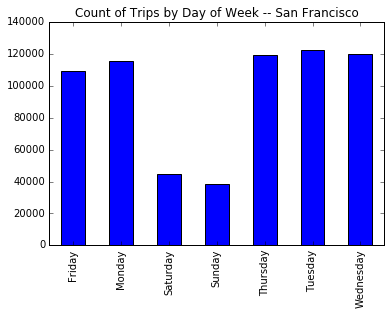

In [8]:

sf_grouped_time.plot.bar(title = 'Count of Trips by Day of Week -- San Francisco', legend= False)

#### New York 

In [14]:
nyc_data_time = nyc_data.copy()
nyc_data_time['Day_Name']= nyc_data_time["starttime"].dt.strftime('%A')

In [16]:
nyc_grouped_time= nyc_data_time.groupby(['Day_Name'], as_index= False )['tripduration'].count()
nyc_grouped_time.head(5)
nyc_grouped_time.set_index('Day_Name',inplace=True)
nyc_grouped_time.index.names = [None]
nyc_grouped_time.columns= ['Count']
nyc_grouped_time

,Count
Friday,2822328
Monday,2774931
Saturday,2324128
Sunday,2280656
Thursday,2832592
Tuesday,2837382
Wednesday,2891007


In [ ]:
nyc_grouped_time= nyc_data_time.groupby(['Day_Name', 'usertype'], as_index= False )['tripduration'].count()

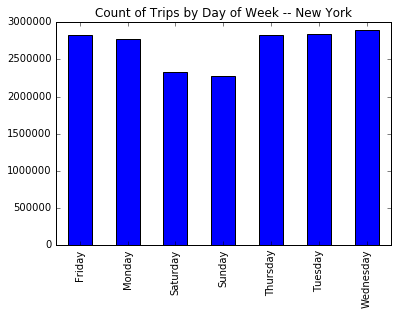

In [17]:
nyc_grouped_time.plot.bar(title = 'Count of Trips by Day of Week -- New York', legend= False)

### Bike Share Usage: Weekday vs Weekend by RiderType

#### San Francisco 

In [29]:
# Takes a few mins to process...
#sf_data_time = sf_data.copy()
sf_data_time['Day_Name']= nyc_data_time["starttime"].dt.strftime('%A')
sf_data_time['Weekend']= list(map(lambda x: 1 if x in ['Saturday','Sunday'] else 0, sf_data_time['Day_Name']))
sf_data_time['Weekday']= list(map(lambda x: 0 if x in ['Saturday','Sunday'] else 1, sf_data_time['Day_Name']))

In [144]:
sf_data_time['Day_Name'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [145]:
sf_week= sf_data_time.groupby(['usertype'])['Weekend','Weekday'].sum()

In [146]:
sf_week['Weekend_2']= sf_week['Weekend']/2
sf_week['Weekday_2']= sf_week['Weekday']/5

In [147]:
sf_week.index.names= [None]
sf_week.head()


,Weekend,Weekday,Weekend_2,Weekday_2
Customer,21290,81923,10645.0,16384.6
Subscriber,130635,436111,65317.5,87222.2


In [148]:
del sf_week['Weekend']
del sf_week['Weekday']


In [149]:
sf_week.columns=['Weekend', 'Weekday']

In [151]:
sf_week_2=sf_week.transpose()

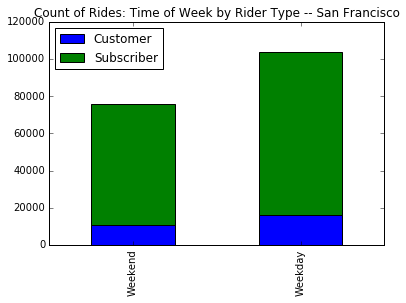

In [152]:
sf_week_2.plot.bar(stacked= True, title='Count of Rides: Time of Week by Rider Type -- San Francisco')

#### New York 

In [120]:
nyc_data_time['Weekend']= list(map(lambda x: 1 if x in ['Saturday','Sunday'] else 0, nyc_data_time['Day_Name']))
nyc_data_time['Weekday']= list(map(lambda x: 0 if x in ['Saturday','Sunday'] else 1, nyc_data_time['Day_Name']))

In [121]:
nyc_week= nyc_data_time.groupby(['usertype'])['Weekend','Weekday'].sum()
nyc_week.head()

,Weekend,Weekday
usertype,,
Customer,1038565,1208110
Subscriber,3566219,12950130


In [122]:
nyc_week['Weekend_2']= nyc_week['Weekend']/2
nyc_week['Weekday_2']= nyc_week['Weekday']/5

In [123]:
nyc_week.head()

,Weekend,Weekday,Weekend_2,Weekday_2
usertype,,,,
Customer,1038565,1208110,519282.5,241622.0
Subscriber,3566219,12950130,1783109.5,2590026.0


In [124]:
del nyc_week['Weekend']
del nyc_week['Weekday']

In [127]:
nyc_week.index.names=[None]

In [137]:
nyc_week.columns=['Weekend', 'Weekday']

In [138]:
nyc_week_2=nyc_week.transpose()


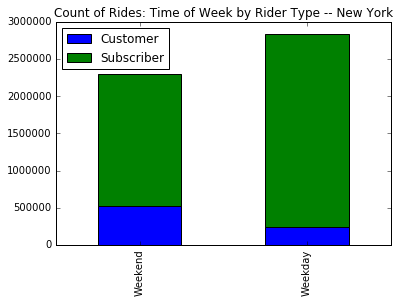

In [139]:
nyc_week_2.plot.bar(stacked= True, title='Count of Rides: Time of Week by Rider Type -- New York')

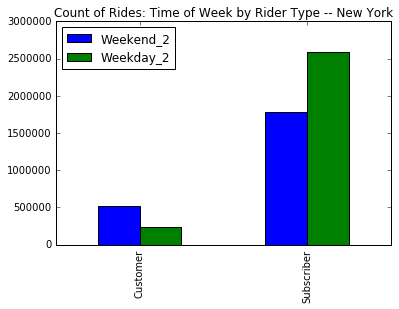

In [126]:
nyc_week.index.names= [None]
nyc_week.plot.bar(title='Count of Rides: Time of Week by Rider Type -- New York')

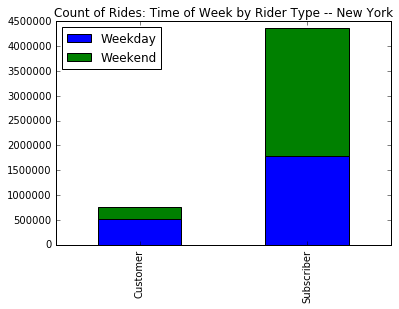

In [46]:
nyc_week.columns = ['Weekday','Weekend']
nyc_week.plot.bar(stacked= True,title='Count of Rides: Time of Week by Rider Type -- New York')

## Bike Share Usage by Time of Day

#### San Francisco

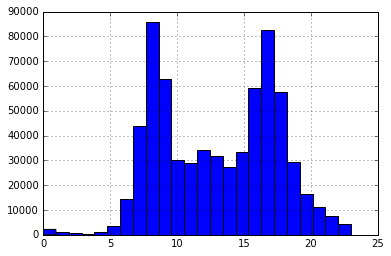

In [62]:
sf_data_time['Day_Hour']= list(map(lambda x:int(x),sf_data_time["starttime"].dt.strftime('%H')))
sf_data_time['Day_Hour'].hist(bins=24)


In [8]:
#sf_data_time['Day_Hour']= list(sf_data_time["starttime"].dt.strftime('%H'))
#sf_data_time['12am-6am']= list(map(lambda x:1 if int(x)>=0 and int(x)<6 else 0, sf_data_time['Day_Hour']))
#sf_data_time['6am-12pm']= list(map(lambda x:1 if int(x)>=6 and int(x)<12 else 0, sf_data_time['Day_Hour']))
#sf_data_time['12pm-6pm']= list(map(lambda x:1 if int(x)>=12 and int(x)<18 else 0, sf_data_time['Day_Hour']))
#sf_data_time['6pm-12am']= list(map(lambda x:1 if int(x)>=18 and int(x)<24 else 0, sf_data_time['Day_Hour']))

In [9]:
#sf_times_1 = pd.Series ([sf_data_time['12am-6am'].sum(),sf_data_time['6am-12pm'].sum(), sf_data_time['12pm-6pm'].sum(),
    #                   sf_data_time['6pm-12am'].sum()], index= ['12am-6am','6am-12pm','12pm-6pm','6pm-12am'])
                
                       
#sf_times_1.plot.bar(title= 'Bike Share Usage by Time of Day -- San Francisco')

#### New York

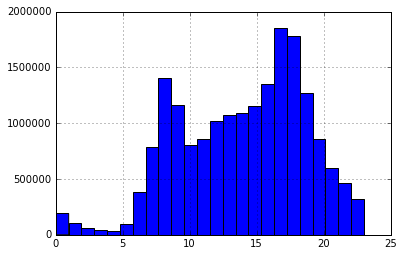

In [60]:
nyc_data_time['Day_Hour']= list(map(lambda x:int(x),nyc_data_time["starttime"].dt.strftime('%H')))
nyc_data_time['Day_Hour'].hist(bins=24)

In [ ]:
#nyc_data_time['Day_Hour']= list(nyc_data_time["starttime"].dt.strftime('%H'))
#nyc_data_time['12am-6am']= list(map(lambda x:1 if int(x)>=0 and int(x)<6 else 0, nyc_data_time['Day_Hour']))
#nyc_data_time['6am-12pm']= list(map(lambda x:1 if int(x)>=6 and int(x)<12 else 0, nyc_data_time['Day_Hour']))
#nyc_data_time['12pm-6pm']= list(map(lambda x:1 if int(x)>=12 and int(x)<18 else 0, nyc_data_time['Day_Hour']))
#nyc_data_time['6pm-12am']= list(map(lambda x:1 if int(x)>=18 and int(x)<24 else 0, nyc_data_time['Day_Hour']))


In [91]:
#nyc_times = pd.Series  ([nyc_data_time['12am-6am'].sum(),nyc_data_time['6am-12pm'].sum(), nyc_data_time['12pm-6pm'].sum(),
     #                  nyc_data_time['6pm-12am'].sum()], index= ['12am-6am','6am-12pm','12pm-6pm','6pm-12am'])
                                       
#nyc_times.plot.bar(title= 'Bike Share Usage by Time of Day -- New York')

#### New York

## Time of Usage by Rider Type

#### San Francisco

In [112]:
# Split by Customer and Subscriber to create Separate Series 
sf_customer_time= sf_data_time[sf_data_time["usertype"]== 'Customer']
sf_subscriber_time= sf_data_time[sf_data_time['usertype']=='Subscriber']

#Group each by Date 
sf_customer_group = sf_customer_time.groupby(['Day_Hour'],as_index=False)['tripduration', 'starttime'].count()
sf_subscriber_group= sf_subscriber_time.groupby(['Day_Hour'],as_index=False)['tripduration','starttime'].count()
sf_alltime =pd.merge(sf_customer_group, sf_subscriber_group, how='left', on ='Day_Hour')


In [113]:

del sf_alltime['starttime_x']
del sf_alltime['starttime_y']
sf_alltime.set_index('Day_Hour', inplace=True)
sf_alltime.index.names=[None]
sf_alltime.columns =['Customer','Subscriber']
sf_alltime.head()

,Customer,Subscriber
0,668,1503
1,508,681
2,335,357
3,172,170
4,110,912


In [109]:
sf_alltime

,Customer,Subscriber
0,668,1503
1,508,681
2,335,357
3,172,170
4,110,912
5,225,3224
6,675,13637
7,1908,42031
8,3861,82003
9,4800,58097


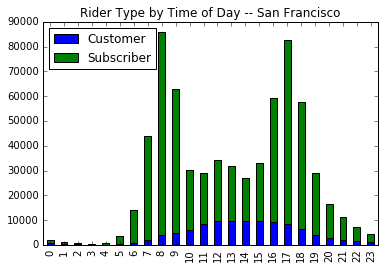

In [111]:
sf_alltime.plot.bar(stacked=True, title= 'Rider Type by Time of Day -- San Francisco')

#### New York

In [115]:
# Split by Customer and Subscriber to create Separate Series 
nyc_customer_time= nyc_data_time[nyc_data_time["usertype"]== 'Customer']
nyc_subscriber_time= nyc_data_time[nyc_data_time['usertype']=='Subscriber']

#Group each by Date 
nyc_customer_group = nyc_customer_time.groupby(['Day_Hour'],as_index=False)['tripduration', 'starttime'].count()
nyc_subscriber_group= nyc_subscriber_time.groupby(['Day_Hour'],as_index=False)['tripduration','starttime'].count()
nyc_alltime =pd.merge(nyc_customer_group, nyc_subscriber_group, how='left', on ='Day_Hour')

In [116]:
del nyc_alltime['starttime_x']
del nyc_alltime['starttime_y']
nyc_alltime.set_index('Day_Hour', inplace=True)
nyc_alltime.index.names=[None]
nyc_alltime.columns =['Customer','Subscriber']
nyc_alltime.head()

,Customer,Subscriber
0,26797,164115
1,16591,91554
2,10453,54350
3,6498,33123
4,4507,31221


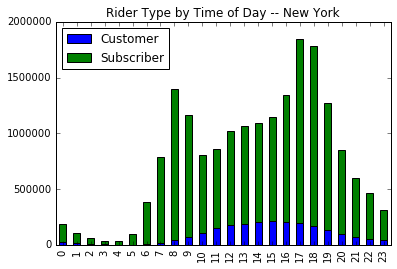

In [118]:
nyc_alltime.plot.bar(stacked=True, title= 'Rider Type by Time of Day -- New York')